In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import cvxopt as opt
#from cvxopt import blas, solvers
import pandas as pd

np.random.seed(123)

# Turn off progress printing 
#solvers.options['show_progress'] = False

In [10]:
## NUMBER OF ASSETS
n_assets = 4

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)
return_vec

array([[ 0.83301604, -0.04252685,  0.54447436, ...,  1.43216877,
         0.4655616 , -0.5191875 ],
       [ 1.35410762,  1.45528661, -0.16595229, ...,  0.61909092,
         0.30157821,  0.29163689],
       [ 1.59878493, -0.60968539, -1.3777955 , ...,  1.64048366,
        -0.36380713,  1.17020765],
       [-0.71375338,  2.07558157, -0.1163507 , ...,  0.35778142,
        -0.66862132,  0.93639815]])

Text(0,0.5,'returns')

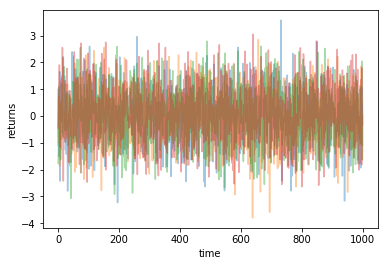

In [3]:
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')

In [4]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print(rand_weights(n_assets))
print(rand_weights(n_assets))

[ 0.54066805  0.2360283   0.11660484  0.1066988 ]
[ 0.27638339  0.03006307  0.47850085  0.21505269]


In [5]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [8]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in iter(range(n_portfolios))
])

Text(0.5,1,'Mean and standard deviation of returns of randomly generated portfolios')

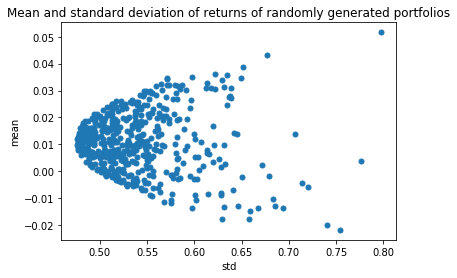

In [9]:
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')